# IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# IMPORTING DATASET AND ANALYSIS
#HERE WE USE "Pima Indians Diabetes Database" DATASET FROM KAGGLE

In [2]:
diabetes_dataset=pd.read_csv("diabetes.csv")

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#NUMBER OF ROWS AND COLUMS IN DATASET
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.isnull().count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [6]:
sum(diabetes_dataset.duplicated())

0

In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
d=diabetes_dataset.groupby('Outcome')[['Glucose','Outcome']].mean()
df=pd.DataFrame(data=d)
df.columns=df.columns.str.strip()

In [10]:
d.head()

,Glucose,Outcome
Outcome,,
0,109.980000,0.0
1,141.257463,1.0


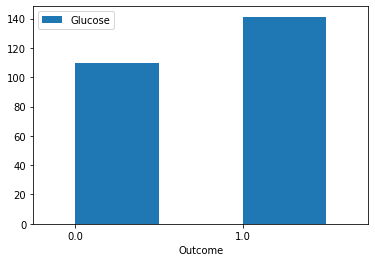

In [11]:
df.plot.bar(x="Outcome",y="Glucose",align='edge',rot=0)
plt.show()

In [12]:
print(df.columns)

Index(['Glucose', 'Outcome'], dtype='object')


# Data Standardization

In [13]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']

In [14]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
scaler=StandardScaler()

In [17]:
x=scaler.fit_transform(x)
#This Give Standardrise Data for Input For Machine
y=diabetes_dataset['Outcome']

In [18]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Train and Test Data Split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


# Let's Train The Model

In [21]:
classifire=svm.SVC(kernel='linear')

In [22]:
#Training the Support Vectore Machine Classifire on our data
classifire.fit(x_train,y_train)

SVC(kernel='linear')

# Model Evaluation 

In [23]:
#Accuracy Score on training data
x_train_prediction=classifire.predict(x_train)
training_data_aacuracy=accuracy_score(x_train_prediction,y_train)
#print(training_data_aacuracy)

In [24]:
#Accuracy Score on testing data
x_testing_prediction=classifire.predict(x_test)
testing_data_aacuracy=accuracy_score(x_testing_prediction,y_test)
#print(testing_data_aacuracy)

In [25]:
print("Accuracy score of training model: ",training_data_aacuracy)
print("Accuracy score of testing model: ",testing_data_aacuracy)

Accuracy score of training model:  0.7752442996742671
Accuracy score of testing model:  0.7727272727272727


In [ ]:
input_data=(5,141,71,22,100,35,0.55,37)

#Change a input from list to numpy array
input_data_as_numpy_array=np.asarray(input_data)
print(input_data_as_numpy_array)

input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

#stanardize the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

prediction=classifire.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

# GUI

In [29]:
import tkinter as tk
from tkinter import ttk
win = tk.Tk()
win.title('Diabetes classification') 

#Column 1 
Preg=ttk.Label(win,text="Pregnancies")
Preg.grid(row=0,column=0,sticky=tk.W)
Preg_var=tk.StringVar()
Preg_entrybox=ttk.Entry(win,width=16,textvariable=Preg_var)
Preg_entrybox.grid(row=0,column=1)
#Column 2
Plas=ttk.Label(win,text="Glucose")
Plas.grid(row=1,column=0,sticky=tk.W)
Plas_var=tk.StringVar()
Plas_entrybox=ttk.Entry(win,width=16,textvariable=Plas_var)
Plas_entrybox.grid(row=1,column=1)
#Column 3
Pres=ttk.Label(win,text="BloodPressure")
Pres.grid(row=2,column=0,sticky=tk.W)
Pres_var=tk.StringVar()
Pres_entrybox=ttk.Entry(win,width=16,textvariable=Pres_var)
Pres_entrybox.grid(row=2,column=1)
#Column 4
skin=ttk.Label(win,text="SkinThickness")
skin.grid(row=3,column=0,sticky=tk.W)
skin_var=tk.StringVar()
skin_entrybox=ttk.Entry(win,width=16,textvariable=skin_var)
skin_entrybox.grid(row=3,column=1)
#Column 5
test=ttk.Label(win,text="Insulin")
test.grid(row=4,column=0,sticky=tk.W)
test_var=tk.StringVar()
test_entrybox=ttk.Entry(win,width=16,textvariable=test_var)
test_entrybox.grid(row=4,column=1)
#Column 6
mass=ttk.Label(win,text="BMI")
mass.grid(row=5,column=0,sticky=tk.W)
mass_var=tk.StringVar()
mass_entrybox=ttk.Entry(win,width=16,textvariable=mass_var)
mass_entrybox.grid(row=5,column=1)
#Column 7
pedi=ttk.Label(win,text="Pedigree")
pedi.grid(row=6,column=0,sticky=tk.W)
pedi_var=tk.StringVar()
pedi_entrybox=ttk.Entry(win,width=16,textvariable=pedi_var)
pedi_entrybox.grid(row=6,column=1)
#Column 8
age=ttk.Label(win,text="age")
age.grid(row=7,column=0,sticky=tk.W)
age_var=tk.StringVar()
age_entrybox=ttk.Entry(win,width=16,textvariable=age_var)
age_entrybox.grid(row=7,column=1)

import pandas as pd
def action():
    DF = pd.DataFrame(columns=['Preg','Plas','Pres','skin','test','mass','pedi','age'])
    PREG=Preg_var.get()
    DF.loc[0,'Preg']=PREG
    PLAS=Plas_var.get()
    DF.loc[0,'Plas']=PLAS
    PRES=Pres_var.get()
    DF.loc[0,'Pres']=PRES
    SKIN=skin_var.get()
    DF.loc[0,'skin']=SKIN
    TEST=test_var.get()
    DF.loc[0,'test']=TEST
    MASS=mass_var.get()
    DF.loc[0,'mass']=MASS
    PEDI=pedi_var.get()
    DF.loc[0,'pedi']=PEDI
    AGE=age_var.get()
    DF.loc[0,'age']=AGE
    return DF

def Output():
    global DB
    DB = action()
    DB["Preg"] = pd.to_numeric(DB["Preg"])
    DB["Plas"] = pd.to_numeric(DB["Plas"])
    DB["Pres"] = pd.to_numeric(DB["Pres"])
    DB["skin"] = pd.to_numeric(DB["skin"])
    DB["test"] = pd.to_numeric(DB["test"])
    DB["mass"] = pd.to_numeric(DB["mass"])
    DB["pedi"] = pd.to_numeric(DB["pedi"])
    DB["age"] = pd.to_numeric(DB["age"])

    import numpy as np
    global output
    DF = DB.astype('float')
    arr=DF.to_numpy()
    s_data=arr.reshape(1,-1)
    #st_data=scaler.transform(s_data)
    prediction=classifire.predict(s_data)
    print(prediction[0])
    return prediction[0]


if(Output==1):
    result='Diabetic'
else: 
    result='Non-Diabetic'

Predict_entrybox=ttk.Entry(win,width=16)
Predict_entrybox.grid(row=20,column=1)
Predict_button=ttk.Button(win,text="Predict",command=Output)
Predict_entrybox.insert(1,str(result))
Predict_button.grid(row=20,column=0)
win.mainloop()

1
1
